In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [2]:

teledf = pd.read_csv('telcomarketing.csv')

In [3]:
teledf.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
teledf.shape

(3333, 20)

In [5]:
teledf.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [6]:
teledf = teledf.replace({'International plan':{'Yes':1,'No':0}})
teledf = teledf.replace({'Voice mail plan':{'Yes':1,'No':0}})

In [ ]:
#more variable changes to follow

In [7]:
#basic testing
#run after changes in dataset

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
X = teledf.drop(columns = ['State', 'Churn'])

scaler = StandardScaler()
pca = PCA()

X_scaled = scaler.fit_transform(X)
X_scaled_pca = pca.fit_transform(X_scaled)

In [9]:
kmeans = KMeans()
dbscan = DBSCAN()
aggclus = AgglomerativeClustering()


In [10]:
sil_score = []

for i in [kmeans, dbscan, aggclus]:
    i.fit(X_scaled_pca)

In [11]:
silhouette_score(X_scaled, kmeans.labels_)

0.07044581888681185

In [12]:
silhouette_score(X_scaled, aggclus.labels_)

0.11841196111342608

In [15]:
silhouette_score(X_scaled, dbscan.labels_)

array([3, 3, 1, ..., 1, 2, 7])

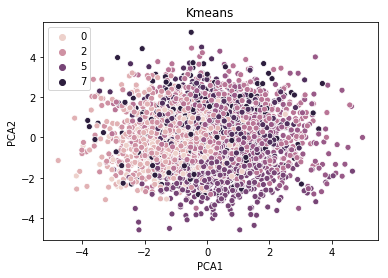

In [25]:
sns.scatterplot(X_scaled_pca[:,0],
               X_scaled_pca[:,1],
               hue = kmeans.labels_)
plt.title('Kmeans')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

#too many clusters

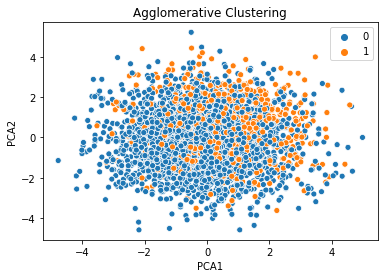

In [26]:
sns.scatterplot(X_scaled_pca[:,0],
               X_scaled_pca[:,1],
               hue = aggclus.labels_)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# too much overlap

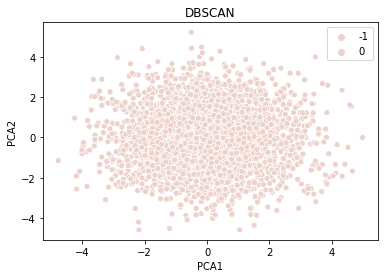

In [27]:
sns.scatterplot(X_scaled_pca[:,0],
               X_scaled_pca[:,1],
               hue = dbscan.labels_)
plt.title('DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

#too much noise
#also unable to compute silhouette score